# Diffusion Pipeline (Automatic)

- Referecnce : https://huggingface.co/docs/diffusers/v0.31.0/en/tutorials/tutorial_overview

/opt/conda/envs/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 50/50 [00:02<00:00, 19.02it/s]


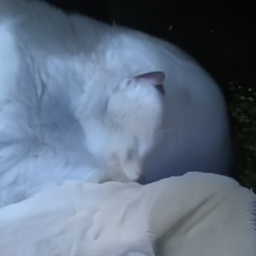

In [1]:
from diffusers import DDPMPipeline

pretrained_link = "google/ddpm-cat-256"
ddpm = DDPMPipeline.from_pretrained(pretrained_link, use_safetensors=False).to("cuda")
image = ddpm(num_inference_steps=50).images[0]
image

# Diffusion Pipeline (Manual)

**1.** Load the model and scheduler:

In [2]:
from diffusers import DDPMScheduler, UNet2DModel

scheduler = DDPMScheduler.from_pretrained(pretrained_link)
model = UNet2DModel.from_pretrained(pretrained_link).to("cuda")

**2.** Set the number of timesteps to run the denoising process for:

In [3]:
scheduler.set_timesteps(50)
print("Num timesteps:",len(scheduler.timesteps))
print("Selected Timesteps:", scheduler.timesteps.tolist())

Num timesteps: 50
Selected Timesteps: [980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720, 700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440, 420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160, 140, 120, 100, 80, 60, 40, 20, 0]


**3**. Create some random noise with the same shape as the desired output:

In [4]:
import torch
sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size)).to("cuda")

**4.** Now write a loop to iterate over the timesteps. At each timestep, the model does a [UNet2DModel.forward()](https://huggingface.co/docs/diffusers/main/en/api/models/unet2d#diffusers.UNet2DModel.forward) pass and returns the noisy residual. The scheduler's [step()](https://huggingface.co/docs/diffusers/main/en/api/schedulers/ddpm#diffusers.DDPMScheduler.step) method takes the noisy residual, timestep, and input and it predicts the image at the previous timestep. This output becomes the next input to the model in the denoising loop, and it'll repeat until it reaches the end of the `timesteps` array.

In [5]:
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
    previous_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
    input = previous_noisy_sample

This is the entire denoising process, and you can use this same pattern to write any diffusion system.

**5.** The last step is to convert the denoised output into an image:

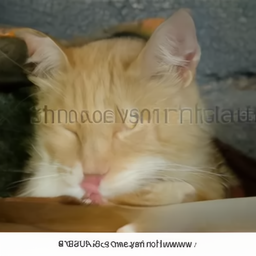

In [6]:
from PIL import Image
import numpy as np

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image

# [DIY] Diffusion Pipeline (Automatic)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch /home/user10/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user10/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
100%|██████████| 50/50 [00:01<00:00, 33.30it/s]


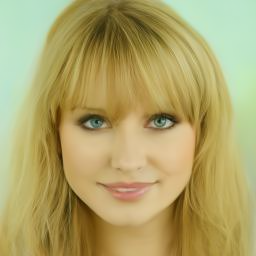

In [ ]:
from diffusers import DiffusionPipeline

pretrained_link = "google/ddpm-celebahq-256"

'''
TODO: Load the other pretrained weight on DiffusionPipeline.
'''
pipe = None

assert 'cuda' in str(pipe.device), f"Change pipe's device to 'cuda', not '{pipe.device}'"
image = pipe(num_inference_steps=50).images[0]
image

# [DIY] Diffusion Pipeline (Manual)

In [ ]:
from diffusers import UNet2DModel, UniPCMultistepScheduler

pretrained_link = "google/ddpm-celebahq-256"

'''
TODO: Load the other pretrained weight on scheduler and model respectively.
TODO: Use UniPCMultistepScheduler scheduler.
'''
scheduler = None # Here
model = None # Here

An error occurred while trying to fetch google/ddpm-celebahq-256: google/ddpm-celebahq-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


**2.** Set the number of timesteps to run the denoising process for:

In [ ]:
'''
TODO: Set number of timesteps to 100
'''
# Here

assert len(scheduler.timesteps)==100, f'Number of timesteps must be 100, not {len(scheduler.timesteps)}'
print("Selected Timesteps:", scheduler.timesteps.tolist())

Selected Timesteps: [999, 989, 979, 969, 959, 949, 939, 929, 919, 909, 899, 889, 879, 869, 859, 849, 839, 829, 819, 809, 799, 789, 779, 769, 759, 749, 739, 729, 719, 709, 699, 689, 679, 669, 659, 649, 639, 629, 619, 609, 599, 589, 579, 569, 559, 549, 539, 529, 519, 509, 500, 490, 480, 470, 460, 450, 440, 430, 420, 410, 400, 390, 380, 370, 360, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10]


**3**. Create some random noise with the same shape as the desired output:

In [10]:
import torch
sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size)).to("cuda")

input = noise

**4**. Now write a loop to iterate over the timesteps. At each timestep, the model does a [UNet2DModel.forward()](https://huggingface.co/docs/diffusers/main/en/api/models/unet2d#diffusers.UNet2DModel.forward) pass and returns the noisy residual. The scheduler's [step()](https://huggingface.co/docs/diffusers/main/en/api/schedulers/ddpm#diffusers.DDPMScheduler.step) method takes the noisy residual, timestep, and input and it predicts the image at the previous timestep. This output becomes the next input to the model in the denoising loop, and it'll repeat until it reaches the end of the `timesteps` array.

In [ ]:
for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
    previous_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
    input = previous_noisy_sample

This is the entire denoising process, and you can use this same pattern to write any diffusion system.

**5.** The last step is to convert the denoised output into an image:

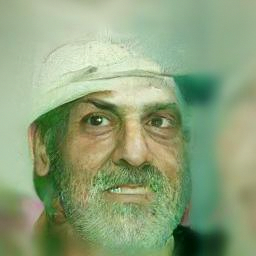

In [ ]:
from PIL import Image
import numpy as np

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image